## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
df = pd.read_csv("preprocessed.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


## Feature Selection

#### Correlation

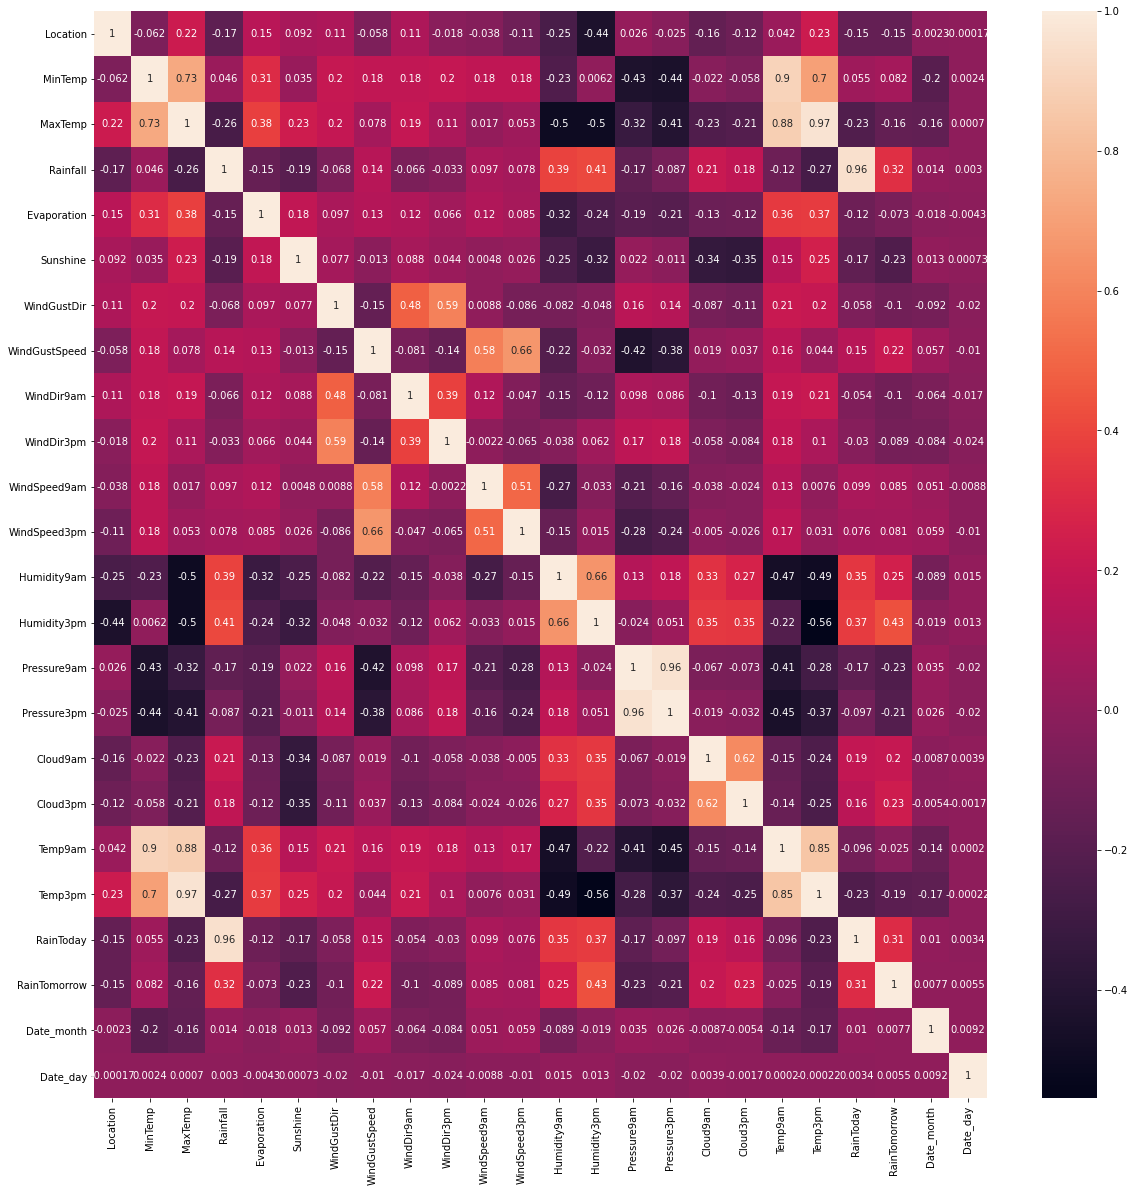

In [4]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

#### Dividing the dataset into independent and dependent features

In [5]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

#### Extra Trees Classifier

In [6]:
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

In [7]:
print(selection.feature_importances_)

[0.03852472 0.03752948 0.03692261 0.05289343 0.0332764  0.04752956
 0.03323272 0.05249742 0.03380055 0.03475458 0.03321762 0.0350845
 0.04899965 0.13819589 0.0473484  0.05034849 0.0323159  0.04063224
 0.03533629 0.03921793 0.03174338 0.032811   0.03378724]


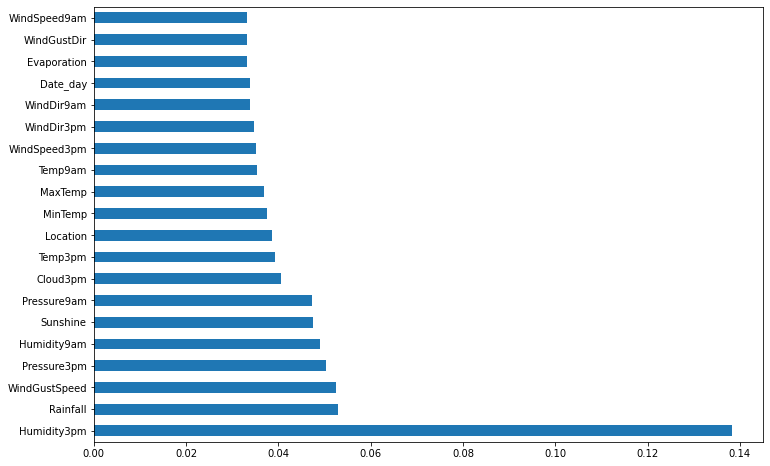

In [8]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

We will consider all the features!